In [135]:
import numpy as np
from astropy.io import fits
from astropy import units as u
from astropy.coordinates import SkyCoord
import sys
import os
import matplotlib.pyplot as plt
from astropy import wcs
import marvin
from marvin.tools import Maps
from marvin.tools import Cube
from marvin.tools.image import Image
import marvin.utils.plot.map as mapplot
from matplotlib.colors import ListedColormap
from astropy.cosmology import Planck18 as cosmo

In [51]:
my_cube = Cube('manga-9889-1902-LOGCUBE.fits.gz')
my_cube

<Marvin Cube (plateifu='9889-1902', mode='local', data_origin='file')>

In [14]:
print(my_cube.filename, my_cube.plateifu, my_cube.mangaid, my_cube.release)
print(my_cube.ra, my_cube.dec)
my_cube.header

manga-9889-1902-LOGCUBE.fits.gz 9889-1902 1-440292 DR17
234.858600293 24.9435693831


XTENSION= 'IMAGE   '           / IMAGE extension                                
BITPIX  =                  -32 / Number of bits per data pixel                  
NAXIS   =                    3 / Number of data axes                            
NAXIS1  =                   34 /                                                
NAXIS2  =                   34 /                                                
NAXIS3  =                 4563 /                                                
PCOUNT  =                    0 / No Group Parameters                            
GCOUNT  =                    1 / One Data Group                                 
AUTHOR  = 'Brian Cherinka & David Law <bcherinka@stsci.edu, dlaw@stsci.edu>' /  
VERSDRP2= 'v3_1_1  '           / MaNGA DRP version (2d processing)              
VERSDRP3= 'v3_1_1  '           / MaNGA DRP Version (3d processing)              
VERSPLDS= 'v5_1    '           / Platedesign Version                            
VERSFLAT= 'v1_33   '        

In [16]:
datamodel = my_cube.datamodel
datamodel

<DRPCubeDataModel release='MPL-11', n_datacubes=3, n_spectra=2>

In [20]:
flux = my_cube.flux
flux

<DataCube [[[0., 0., 0., ..., 0., 0., 0.],
            [0., 0., 0., ..., 0., 0., 0.],
            [0., 0., 0., ..., 0., 0., 0.],
            ...,
            [0., 0., 0., ..., 0., 0., 0.],
            [0., 0., 0., ..., 0., 0., 0.],
            [0., 0., 0., ..., 0., 0., 0.]],

           [[0., 0., 0., ..., 0., 0., 0.],
            [0., 0., 0., ..., 0., 0., 0.],
            [0., 0., 0., ..., 0., 0., 0.],
            ...,
            [0., 0., 0., ..., 0., 0., 0.],
            [0., 0., 0., ..., 0., 0., 0.],
            [0., 0., 0., ..., 0., 0., 0.]],

           [[0., 0., 0., ..., 0., 0., 0.],
            [0., 0., 0., ..., 0., 0., 0.],
            [0., 0., 0., ..., 0., 0., 0.],
            ...,
            [0., 0., 0., ..., 0., 0., 0.],
            [0., 0., 0., ..., 0., 0., 0.],
            [0., 0., 0., ..., 0., 0., 0.]],

           ...,

           [[0., 0., 0., ..., 0., 0., 0.],
            [0., 0., 0., ..., 0., 0., 0.],
            [0., 0., 0., ..., 0., 0., 0.],
            ...,
      

In [41]:
spectrum = flux[:, 0, 50]
spectrum

IndexError: index 50 is out of bounds for axis 2 with size 34

[WARNING]: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here. (DeprecationWarning)
[WARNING]: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information. (DeprecationWarning)
[WARNING]: The truth value of a Quantity is ambiguous. In the future this will raise a ValueError. (AstropyDeprecationWarning)


<AxesSubplot:xlabel='$\\mathrm{Wavelength}\\,[$$\\mathrm{\\mathring{A}}$$]$', ylabel='$\\mathrm{Flux}\\,[$$\\mathrm{1 \\times 10^{-17}\\,erg\\,\\mathring{A}^{-1}\\,s^{-1}\\,spaxel^{-1}\\,cm^{-2}}$$]$'>

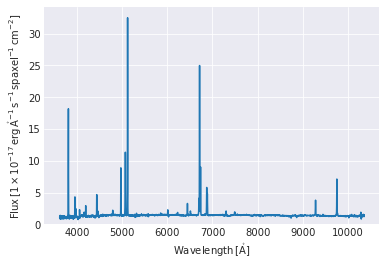

In [57]:
spax = my_cube[17, 17]
spax.flux.plot()

In [42]:
hyb_maps = my_cube.getMaps(bintype='HYB10')

In [46]:
my_cube_map = marvin.tools.Maps('9889-1902')
hb = my_cube_map.emline_glfux_hb_4862
ha = my_cube_map.emline_gflux_ha_6564
ha
hb

<Marvin Map (property='emline_gflux_hb_4862')>
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] 1e-17 erg / (cm2 s spaxel)

[WARNING]: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first. (MatplotlibDeprecationWarning)


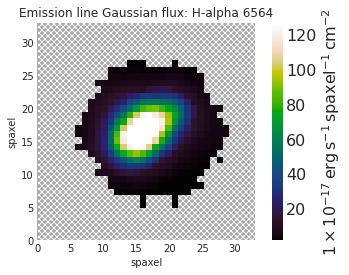

In [48]:
fig, ax = ha.plot()

[WARNING]: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first. (MatplotlibDeprecationWarning)


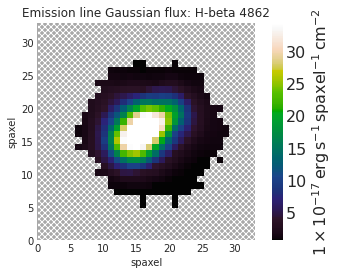

In [49]:
fig, ax = hb.plot()

<WCSAxes:>

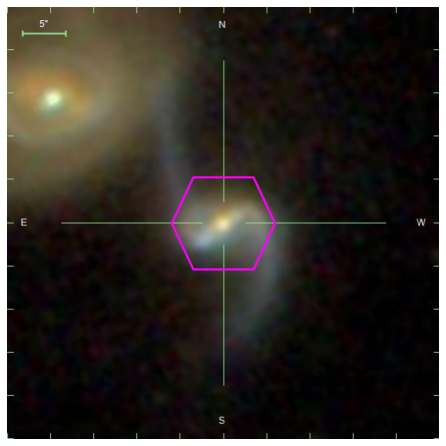

In [111]:
image = Image(plateifu='9889-1902')
image.plot(figsize=(15,15))

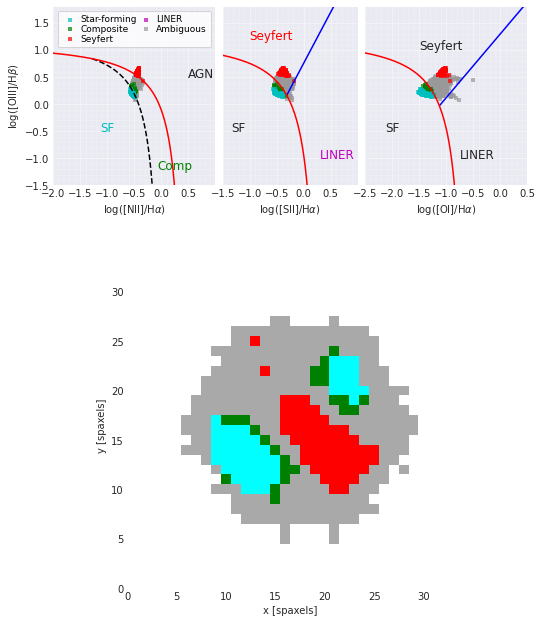

In [100]:
maps = Maps('9889-1902')
masks, fig, axes = maps.get_bpt()

[WARNING]: invalid value encountered in multiply (RuntimeWarning)
[WARNING]: invalid value encountered in true_divide (RuntimeWarning)
[WARNING]: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first. (MatplotlibDeprecationWarning)
[WARNING]: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first. (MatplotlibDeprecationWarning)
[WARNING]: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first. (MatplotlibDeprecationWarning)
[WARNING]: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first. (MatplotlibDeprecationWarning)
[WARNING]: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and

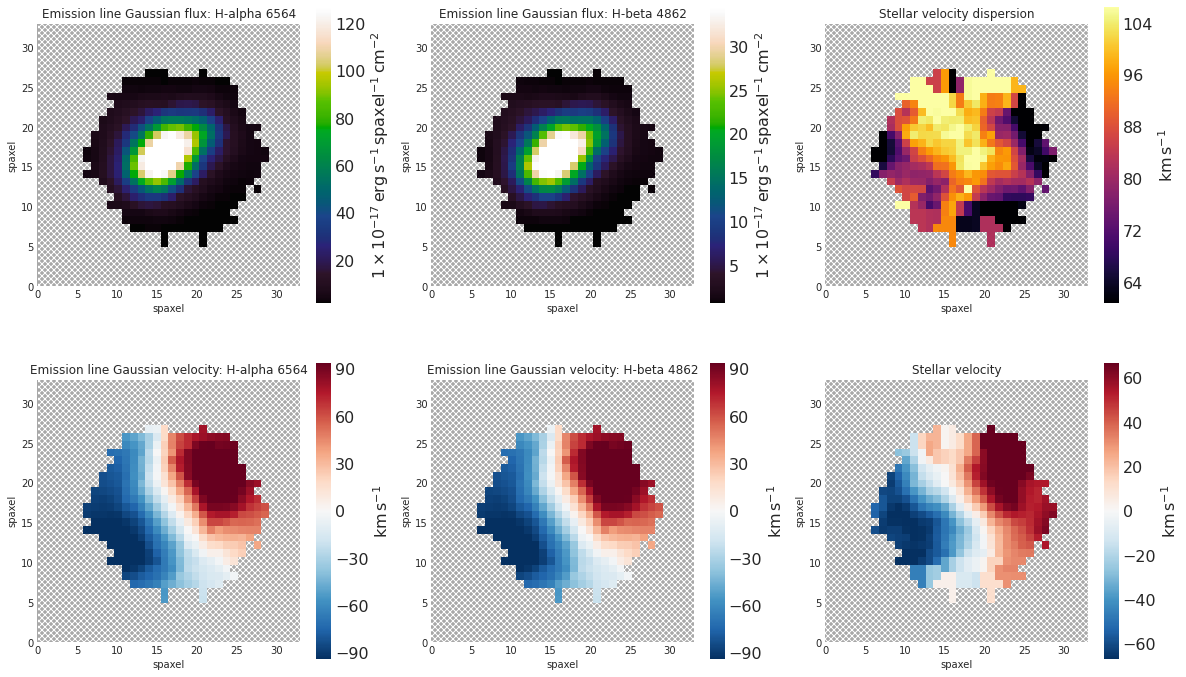

In [110]:
maps = Maps('9889-1902')

halpha = maps.emline_gflux_ha_6564
hbeta = maps.emline_gflux_hb_4862
havel = maps.emline_gvel_ha_6564
hbvel = maps.emline_gvel_hb_4862
nii_ha = np.log10(maps.emline_gflux_nii_6585 / halpha)
oiii_hb = np.log10(maps.emline_gflux_oiii_4862 / hbeta)
stvel = maps.stellar_vel
stsig = maps.stellar_sigma
stsig_corr = stsig.inst_sigma_correction()

with plt.style.context('seaborn-darkgrid'):
    fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 12))
    halpha.plot(fig=fig, ax=axes[0, 0])
    hbeta.plot(fig=fig, ax=axes[0, 1])
    stsig_corr.plot(fig=fig, ax=axes[0, 2])
    havel.plot(fig=fig, ax=axes[1, 0])
    hbvel.plot(fig=fig, ax=axes[1, 1])
    #nii_ha.plot(fig=fig, ax=axes[0, 2], title="log([NII]6585 / H-alpha)", snr_min=None)
    #oiii_hb.plot(fig=fig, ax=axes[1, 0], title="log([OIII]4862 / H-beta)", snr_min=None)
    stvel.plot(fig=fig, ax=axes[1, 2])

[WARNING]: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first. (MatplotlibDeprecationWarning)
[WARNING]: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first. (MatplotlibDeprecationWarning)


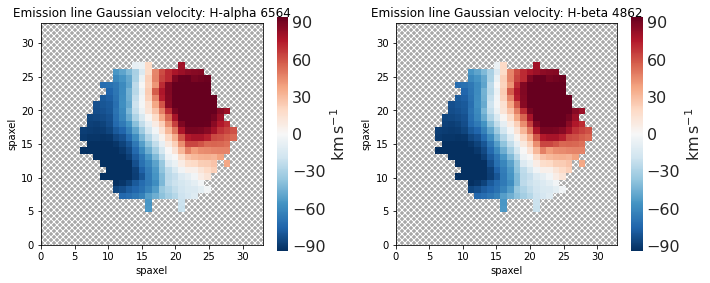

In [80]:
maps = Maps('9889-1902')
havel = maps.emline_gvel_ha_6564
hbvel = maps.emline_gvel_hb_4862
vel_maps = [havel, hbvel]

cbranges = [vel_map.plot(return_cbrange=True) for vel_map in vel_maps]
cb_max = np.max(np.abs(cbranges))
cbrange = (-cb_max, cb_max)

fig, axes = plt.subplots(ncols=2, figsize=(10, 4))
for ax, vel_map in zip(axes, vel_maps):
    vel_map.plot(fig=fig, ax=ax, cbrange=cbrange)

fig.tight_layout()

[WARNING]: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first. (MatplotlibDeprecationWarning)
[WARNING]: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first. (MatplotlibDeprecationWarning)


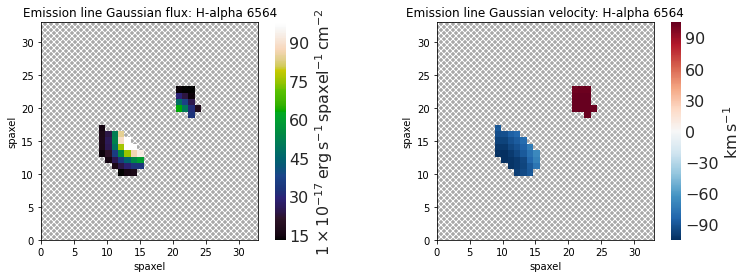

In [123]:
maps = Maps('9889-1902')
ha = maps.emline_gflux_ha_6564
havel = maps.emline_gvel_ha_6564
masks = maps.get_bpt(show_plot=False, return_figure=False)

# Create a bitmask for non-star-forming spaxels by taking the
# complement (`~`) of the BPT global star-forming mask (where True == star-forming)
# and set bit 30 (DONOTUSE) for those spaxels.
mask_non_sf = ~masks['sf']['global'] * ha.pixmask.labels_to_value('DONOTUSE')

# Do a bitwise OR between DAP mask and non-star-forming mask.
mask = ha.mask | mask_non_sf

fig, axes = plt.subplots(ncols=2, figsize=(13, 4))
ha.plot(mask=mask, fig=fig, ax=axes[0])
havel.plot(mask=mask, fig=fig, ax=axes[1])
plt.show()

[WARNING]: invalid value encountered in true_divide (RuntimeWarning)
[WARNING]: invalid value encountered in log10 (RuntimeWarning)
[WARNING]: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first. (MatplotlibDeprecationWarning)
[WARNING]: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first. (MatplotlibDeprecationWarning)
[WARNING]: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first. (MatplotlibDeprecationWarning)
[WARNING]: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first. (MatplotlibDeprecationWarning)


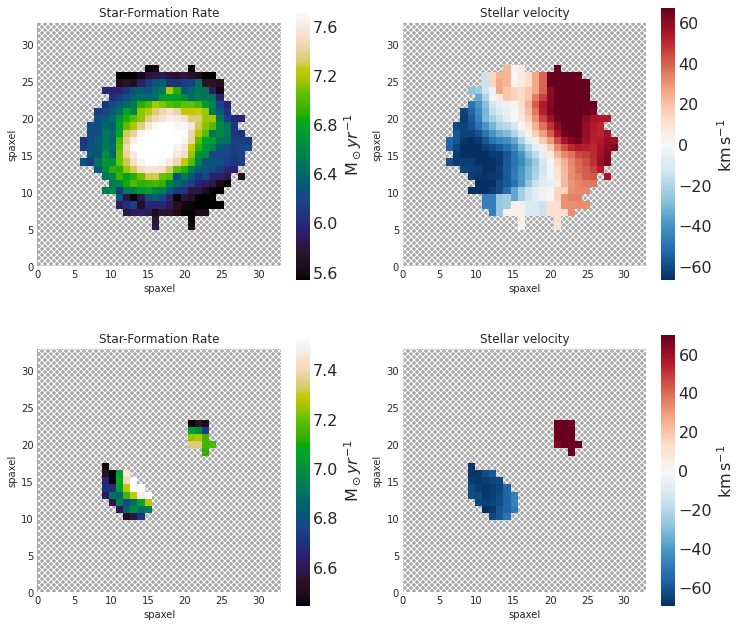

In [200]:
maps = Maps('9889-1902')
ha = maps.emline_gflux_ha_6564
hb = maps.emline_gflux_hb_4862
logFha = np.log10(ha)+(2.468*1.97*np.log10((ha.value/hb.value)/2.86))
DL = (cosmo.comoving_distance(0.0228218)).value
logLha = logFha+np.log10(4*np.pi*DL**2)
logSFR = logLha+np.log10(5.5*10**(-42))
stvel = maps.stellar_vel

# Mask out non-star-forming spaxels
masks, __, __ = maps.get_bpt(show_plot=False)

# Create a bitmask for non-star-forming spaxels by taking the
# complement (`~`) of the BPT global star-forming mask (where True == star-forming)
# and set bit 30 (DONOTUSE) for those spaxels.
mask_non_sf = ~masks['sf']['global'] * ha.pixmask.labels_to_value('DONOTUSE')

# Do a bitwise OR between DAP mask and non-star-forming mask.
mask = logSFR.mask | mask_non_sf

with plt.style.context('seaborn-darkgrid'):
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,11))
    logLha.plot(fig=fig, ax=axes[0,0], title="Star-Formation Rate", snr_min=None, cblabel='M$_\odot yr^{-1}$')
    stvel.plot(fig=fig, ax=axes[0,1])
    logLha.plot(fig=fig, ax=axes[1,0], title="Star-Formation Rate", snr_min=None, mask=mask, cblabel='M$_\odot yr^{-1}$')
    stvel.plot(fig=fig, ax=axes[1,1], mask=mask)

[WARNING]: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first. (MatplotlibDeprecationWarning)


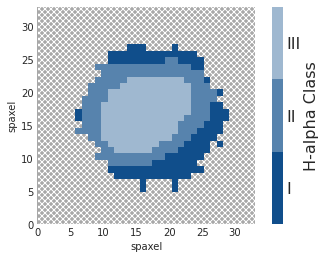

In [72]:
maps = Maps('9889-1902')
ha = maps.emline_gflux_ha_6564

# divide data into classes
ha_class = np.ones(ha.shape, dtype=int)
ha_class[np.where(ha.value > 5)] = 2
ha_class[np.where(ha.value > 20)] = 3

cmap = ListedColormap(['#104e8b', '#5783ad', '#9fb8d0'])
fig, ax, cb = mapplot.plot(dapmap=ha, value=ha_class, cmap=cmap, cbrange=(0.5, 3.5),
                           title='', cblabel='H-alpha Class', return_cb=True)
cb.set_ticks([1, 2, 3])
cb.set_ticklabels(['I', 'II', 'III'])

In [157]:
drpall = fits.open('drpall-v3_1_1.fits')
tbdata = drpall[1].data

# Print column names
print(tbdata['nsa_z'][11177])

[WARNING]: unclosed file <_io.FileIO name='drpall-v3_1_1.fits' mode='rb' closefd=True> (ResourceWarning)


0.0228218


[WARNING]: invalid value encountered in log10 (RuntimeWarning)
[WARNING]: invalid value encountered in multiply (RuntimeWarning)
[WARNING]: invalid value encountered in true_divide (RuntimeWarning)
[WARNING]: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first. (MatplotlibDeprecationWarning)
[WARNING]: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first. (MatplotlibDeprecationWarning)
[WARNING]: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first. (MatplotlibDeprecationWarning)
[WARNING]: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first. (MatplotlibDeprecationWarning)


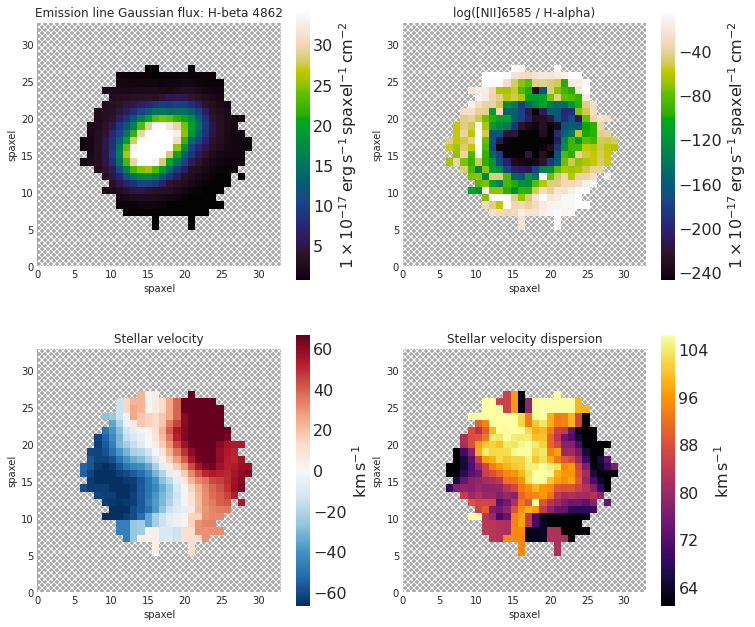

In [163]:
maps = Maps('9889-1902')

hbeta = maps.emline_gflux_hb_4862
ha_hb = np.log10(maps.emline_gflux_ha_6564 / hbeta)
stvel = maps.stellar_vel
stsig = maps.stellar_sigma
stsig_corr = stsig.inst_sigma_correction()

with plt.style.context('seaborn-darkgrid'):
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 11))
    hbeta.plot(fig=fig, ax=axes[0, 0])
    logSFR.plot(fig=fig, ax=axes[0, 1], title="log([NII]6585 / H-alpha)", snr_min=None)
    stvel.plot(fig=fig, ax=axes[1, 0])
    stsig_corr.plot(fig=fig, ax=axes[1, 1])